In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_squared_error


In [2]:
results = pd.read_csv('results/tune_rfr.csv')
results.shape

(1920, 9)

In [3]:
results.columns


Index(['name', 'method', 'feature', 'depth', 'trees', 'rmse', 'f1', 'f2',
       'f3'],
      dtype='object')

In [4]:

print("names {}".format(list(results['name'].value_counts().to_dict().keys())))
print("features {}".format(list(results['feature'].value_counts().to_dict().keys())))
print("depth {}".format(list(results['depth'].value_counts().to_dict().keys())))
print("trees {}".format(list(results['trees'].value_counts().to_dict().keys())))

names ['ADMECaco2', 'MouseRatTox', 'Xanthine-Bostaurus', 'Caco2', 'TB_SRI', 'MalariaNovartis', 'MalariaGSK', 'LogP', 'Chagas', 'TB_MDR']
features ['cdk_fp', 'rdkit_desc', 'cdk_desc', 'rdkit_fp']
depth [30, 20, 15, 10, 5, 2]
trees [70, 60, 50, 40, 30, 20, 10, 5]


In [5]:

min_summary = results.loc[results.groupby("name", as_index=False)["rmse"].idxmin()].sort_values('name')
min_summary

,name,method,feature,depth,trees,rmse,f1,f2,f3
1770,ADMECaco2,RandomForest,cdk_fp,30,20,0.601314,0.662094,0.585088,0.556759
1699,Caco2,RandomForest,rdkit_desc,10,30,0.536183,0.542730,0.498519,0.567298
1054,Chagas,RandomForest,rdkit_fp,30,60,0.476633,0.476455,0.497831,0.455613
1295,LogP,RandomForest,cdk_desc,30,70,0.541107,0.579731,0.553042,0.490549
479,MalariaGSK,RandomForest,rdkit_fp,30,70,0.277821,0.286392,0.278389,0.268681
367,MalariaNovartis,RandomForest,rdkit_desc,15,70,0.537151,0.541087,0.538883,0.531484
1533,MouseRatTox,RandomForest,rdkit_desc,30,50,1.174464,1.159680,1.131569,1.232144
861,TB_MDR,RandomForest,rdkit_fp,30,50,0.568861,0.582946,0.572742,0.550894
669,TB_SRI,RandomForest,rdkit_fp,30,50,0.631282,0.645855,0.637273,0.610718
94,Xanthine-Bostaurus,RandomForest,rdkit_fp,30,60,0.654093,0.788926,0.597029,0.576323


In [6]:
from collections import namedtuple
Params = namedtuple('Settings', ['depth', 'trees', 'rmse', 'feature'])
best = None
for feature in list(results['feature'].value_counts().to_dict().keys()):
    for depth in list(results['depth'].value_counts().to_dict().keys()):
        for trees in list(results['trees'].value_counts().to_dict().keys()):
            test_df = results[(results['depth'] == depth) & (results['trees'] == trees) & (results['feature'] == feature)]
            test_df = test_df.loc[test_df.groupby("name", as_index=False)["rmse"].idxmin()][['name', 'rmse']]
            join_df = min_summary.merge(test_df, how='inner', on='name', suffixes=('_min', '_test'))[['name', 'rmse_min', 'rmse_test']]
            rmse = math.sqrt(mean_squared_error(join_df['rmse_min'], join_df['rmse_test']))
            if best is None or best.rmse > rmse:
                best = Params(depth, trees, rmse, feature)
            print("depth {} trees {} rmse {}".format(depth, trees, rmse))
print("Best: depth {} trees {} rmse {} feature {}".format(best.depth, best.trees, best.rmse, best.feature))

depth 30 trees 70 rmse 0.13573352776019276
depth 30 trees 60 rmse 0.13703699254468815
depth 30 trees 50 rmse 0.13702998481057077
depth 30 trees 40 rmse 0.1384017816610194
depth 30 trees 30 rmse 0.1387283804545071
depth 30 trees 20 rmse 0.14501625713934366
depth 30 trees 10 rmse 0.143881243795556
depth 30 trees 5 rmse 0.17025677393488073
depth 20 trees 70 rmse 0.14097465673825907
depth 20 trees 60 rmse 0.14226675605640143
depth 20 trees 50 rmse 0.14154291710423916
depth 20 trees 40 rmse 0.14288478200182797
depth 20 trees 30 rmse 0.14368480719021004
depth 20 trees 20 rmse 0.14947370562562048
depth 20 trees 10 rmse 0.14737807803151212
depth 20 trees 5 rmse 0.1734922420834343
depth 15 trees 70 rmse 0.14941159915698216
depth 15 trees 60 rmse 0.15233792317153383
depth 15 trees 50 rmse 0.14983181704047938
depth 15 trees 40 rmse 0.15153534944549782
depth 15 trees 30 rmse 0.15213194766579485
depth 15 trees 20 rmse 0.15819785333787081
depth 15 trees 10 rmse 0.15590385951100832
depth 15 trees 5 r

In [7]:
common_df = results[(results['depth'] == best.depth) & (results['trees'] == best.trees) &(results['feature'].isin(['rdkit_fp', 'rdkit_desc']))]
common_df.shape

(20, 9)

In [8]:
best_summary = common_df.loc[common_df.groupby("name", as_index=False)["rmse"].idxmin()][['name', 'feature', 'rmse']].sort_values('name')
best_summary

,name,feature,rmse
1806,ADMECaco2,rdkit_fp,0.626368
1710,Caco2,rdkit_desc,0.545762
1038,Chagas,rdkit_fp,0.482772
1326,LogP,rdkit_desc,0.554008
462,MalariaGSK,rdkit_fp,0.289774
366,MalariaNovartis,rdkit_desc,0.537927
1518,MouseRatTox,rdkit_desc,1.180145
846,TB_MDR,rdkit_fp,0.589790
654,TB_SRI,rdkit_fp,0.635201
78,Xanthine-Bostaurus,rdkit_fp,0.655058


In [9]:
summary = min_summary.merge(best_summary, how='inner', on='name', suffixes=('_min', '_common'))[['name', 'rmse_min', 'rmse_common']]
summary['delta'] = summary['rmse_common'] - summary['rmse_min']
summary.to_csv('tune_random_forest_regression_all_continuous2_summary.csv')
summary

,name,rmse_min,rmse_common,delta
0,ADMECaco2,0.601314,0.626368,0.025055
1,Caco2,0.536183,0.545762,0.009580
2,Chagas,0.476633,0.482772,0.006139
3,LogP,0.541107,0.554008,0.012901
4,MalariaGSK,0.277821,0.289774,0.011953
5,MalariaNovartis,0.537151,0.537927,0.000775
6,MouseRatTox,1.174464,1.180145,0.005681
7,TB_MDR,0.568861,0.589790,0.020929
8,TB_SRI,0.631282,0.635201,0.003919
9,Xanthine-Bostaurus,0.654093,0.655058,0.000965


In [10]:

math.sqrt(mean_squared_error(summary['rmse_min'], summary['rmse_common']))

0.012464753292281782

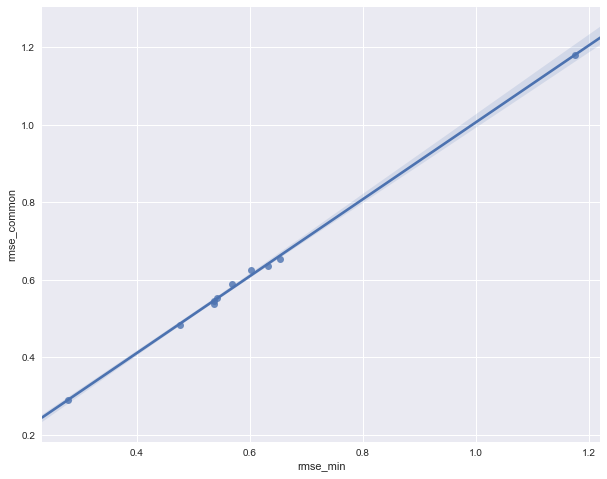

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.regplot(x='rmse_min', y='rmse_common', data=summary, ax=axes)
axes.plot([0.2, 0.2], [1.2, 1.2], linewidth=2)

In [12]:
best_summary['cat']='best'
min_summary['cat']='min'
summary_cat = best_summary.append(min_summary)[['name', 'cat', 'feature', 'rmse']]

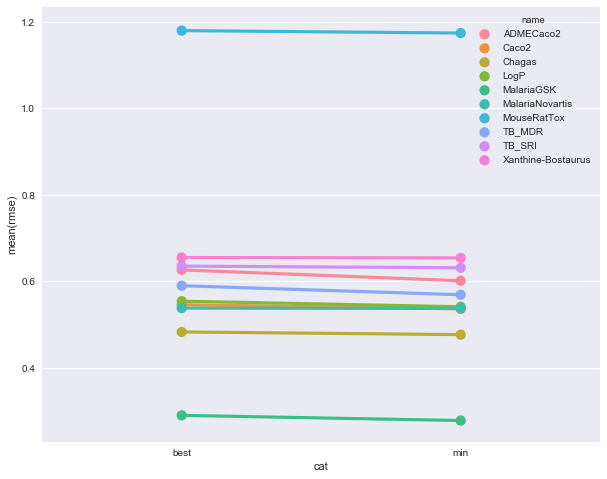

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.pointplot(x='cat', y='rmse', hue='name', data=summary_cat, ax=axes)